In [36]:
from konlpy.tag import Okt
import pandas as pd

#데이터 로드
df = pd.read_csv('data/프로젝트 데이터_API/상해_본문2.csv')

#NaN값 처리
df['판례내용'] = df['판례내용'].fillna('')

#Okt호출
okt = Okt()

#정규화한 뒤 명사추출
normalized = df['판례내용'].apply(lambda x: ' '.join(okt.nouns(okt.normalize(x))))

normalized.head(10)

0    원고 상고 겸 피상 고인 서비스 소송대리인 법무 법인 케이원 챔버 담당 변호사 김경...
1    피 고 인 피고인 상 고 인 피고인 및 검사 원심 판결 대전 지법 선고 노 판결 주...
2    피 고 인 피고인 상 고 인 피고인 변 호 인 변호사 유 소정 원심 판결 인천 지법...
3    피 고 인 피고인 상 고 인 피고인 변 호 인 변호사 영희 외 인 원심 판결 광주 ...
4    피 고 인 피고인 상 고 인 피고인 변 호 인 변호사 홍 푸른 원심 판결 대구 고법...
5    피고인 겸 피부 착 명령 청구 피고인 겸 피부 착 명령 청구 상 고 인 피고인 겸 ...
6    피 고 인 피고인 상 고 인 피고인 변 호 인 변호사 박수 열 외 인 원심 판결 서...
7    피 고 인 피고인 항 소 인 피고인 검 사 기소 나혜윤 공판 원심 판결 서울 중앙 ...
8    피 고 인 피고인 상 고 인 피고인 변 호 인 변호사 이재철 원심 판결 서울 북부 ...
9    피 고 인 피고인 항 소 인 피고인 및 검사 검 사 한승진 기소 황 의수 공판 변 ...
Name: 판례내용, dtype: object

In [42]:
import pickle


# 피클 파일로 저장
with open('data/okt.pkl', 'wb') as f:
    pickle.dump(normalized, f)

In [81]:
#불용어 읽어오기
stopwords_file_path = 'stopwords_dh.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]


In [96]:
from collections import Counter

word_freq = Counter(normalized)
most_common_words = word_freq.most_common(50)
print(most_common_words)

[('원고 상고 겸 피상 고인 서비스 소송대리인 법무 법인 케이원 챔버 담당 변호사 김경선 외 인 피고 피상 고인 서초세무서 소송대리인 법무 법인 남산 담당 변호사 이창 외 인 피고 피상 고인 겸 상고 서초구청장 환송 판결 대법원 선고 두 판결 주 문 원고 원심 승소 부분 대한 상고 각하 심판 결의 원고 패소 부분 중 사업 연도 법인세 가산 세 포함 부분 제 기분 부가가치세 가산 세 중 신고 불성 실가 산세 부분 자 사업 연도 법인세 민세 가산 세 포함 부분 각 파기 이 부분 사건 고등법원 환송 피고 서초구청장 상고 기각 이 유 원고 원심 승소 부분 대한 상고 적법 여부 관 직권 판단 판결 중 승소 부분 대한 상소 그 이익 부 대법원 선고 두 판결 등 참조 원고 환송 후 원심 이하 원심 판결 전부 파기 구 상고 취지 기재 상고 제출 원심 피고 일부 처분 취소 원고 피고 대하 각 승소 부분 대하 여 상고 로써 불복 이익 존재 따라서 이 부분 원고 상고 부 과세표준 증명책임 등 대한 원고 제 상고 이유 관 판단 사업 연도 법인세 가산 세 포함 및 자 사업 연도 법인세 민세 가산 세 포함 부과 처분 대하 관련 규정 구 법인 세법 법률 제 호로 개정 전의 것 이하 제 제 항 국내 사업 외국 법인 등 각 사업 연도 소득 대한 법인세 과세표준 국내 소득 합계 액 제 제 항의 규정 징수 국내 소득 금액 외한 다음 호의 규정 금액 소득 순차 공제 금액 고 규정 제 호 선박 항공기 외국 항행 발생 소득 다만 그 외국 법인 본점 사무소 외국 우리나라 법인 운용 선박 항공기 대하 면제 경우 이하 상호 면세 고 규정 구 법인 세법 제 호 외국 법인 국내 소득 열거 제 호 본문 외국 법인 영위 사업 발생 소득 조약 국내 원천 사업 소득 과세 수 소득 포함 대통령령 정 것 국내 원천 사업 소득 규정 그 위임 법인 세법 시행 령 제 제 항 제 호 국내 원천 사업 소득 중 하나로 외국 법인 국내 및 국외 선박 국제 운송업 영위 경우 국내 승선 여객 선적 화물 관련 발생 수입 금액 기준 판

# 워드클라우드

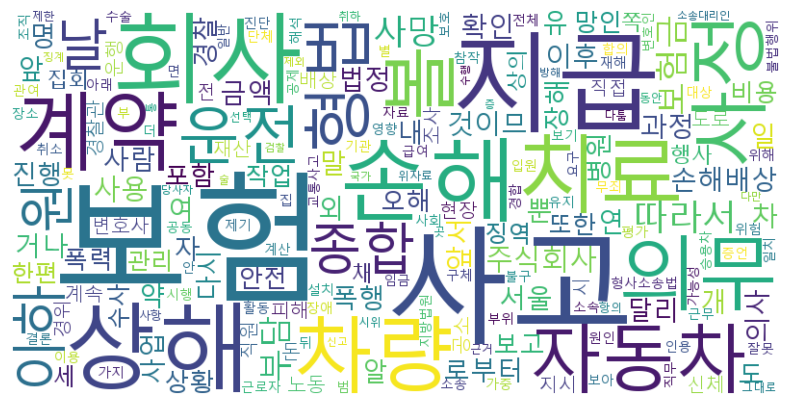

In [89]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import pickle

# 피클 파일에서 Series 불러오기
with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)

# 모든 명사 추출하여 하나의 문자열로 결합
all_nouns = ' '.join(normalized.dropna())

# 명사 빈도 계산
word_freq = Counter(word for word in all_nouns.split() if word not in stopwords)

# 한글 폰트 경로 지정 (맑음고딕 폰트를 사용한 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 경로 수정

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [90]:
print(word_freq.most_common)

<bound method Counter.most_common of Counter({'보험': 27210, '사고': 22067, '지급': 15425, '회사': 12603, '상해': 12064, '손해': 10791, '치료': 9335, '계약': 9319, '차량': 8815, '의무': 8407, '사정': 8197, '볼': 7816, '자동차': 7622, '형법': 6938, '운전': 6489, '종합': 6434, '원': 6434, '이하': 6417, '날': 6414, '따라서': 6047, '보험금': 5659, '부담': 5500, '사망': 5488, '주식회사': 5432, '사용': 5406, '손해배상': 5211, '약': 5187, '자': 5169, '폭행': 5135, '일': 5087, '도': 5054, '로부터': 5032, '말': 5028, '앞': 4849, '내': 4840, '뿐': 4819, '의사': 4665, '사람': 4636, '앞서': 4611, '것이므': 4565, '이후': 4551, '연': 4498, '거나': 4491, '개': 4489, '확인': 4411, '서울': 4400, '차': 4364, '명': 4341, '여': 4332, '과정': 4328, '금액': 4306, '법정': 4270, '진행': 4116, '달리': 4106, '장해': 4086, '포함': 4085, '유': 4060, '알': 4021, '병원': 4021, '외': 4008, '다시': 4004, '경찰': 3999, '보고': 3980, '사업': 3966, '오해': 3959, '상황': 3931, '폭력': 3916, '망인': 3890, '또한': 3840, '안전': 3835, '비용': 3829, '작업': 3801, '관리': 3739, '세': 3734, '한편': 3724, '수사': 3684, '징역': 3608, '행사': 3580, '집회': 3560, '상의': 3533,

# LDA

In [17]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# 피클 파일에서 Series 불러오기
with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)

#불용어 읽어오기
stopwords_file_path = 'stopwords_dh.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]
    
# 불용어 제거 및 LDA 적용
def remove_stopwords(text):
    tokens = text.split()  # 공백으로 나누기
    filtered_tokens = [word for word in tokens if word not in stopwords]  # 불용어 제거
    return ' '.join(filtered_tokens)  # 다시 문자열로 결합

# 각 판시사항에서 불용어 제거
filtered_normalized = normalized.apply(remove_stopwords)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filtered_normalized)

num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    top_features_ind = topic.argsort()[-10:][::-1]
    top_features = [vectorizer.get_feature_names_out()[i] for i in top_features_ind]
    print(" ".join(top_features))

Topic 0:
집회 경찰관 경찰 상해 시위 폭행 체포 방해 폭력 형법
Topic 1:
회사 작업 안전 사업 징계 사고 관리 선박 의무 지시
Topic 2:
보험 계약 지급 보험금 손해 회사 자동차 사고 주식회사 금액
Topic 3:
지급 임금 근로 수당 근로자 근무 재산 이혼 공무원 혼인
Topic 4:
사망 학생 국가 보호 중국 강제 살인 대한민국 위안부 의무
Topic 5:
사고 차량 운전 자동차 운행 도로 교통사고 손해 승용차 진행
Topic 6:
조직 활동 단체 직원 북한 혁명 압수 국가 전쟁 준비
Topic 7:
보고 수사 검찰 허위 문건 자백 건물 증언 가스 경찰
Topic 8:
치료 사고 손해 장해 병원 지급 입원 수술 노동 상해
Topic 9:
형법 상해 징역 폭행 가중 강간 폭력 형사소송법 공소 수사


In [18]:
from gensim import corpora
from gensim.models import LdaModel

#불용어 읽어오기
stopwords_file_path = 'stopwords_dh.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

# 불용어 제거 함수
def remove_stopwords_list(tokens):
    return [word for word in tokens if word not in stopwords]  # 불용어 제거

Lda_normalized = normalized.apply(lambda x: x.split()) #normalized를 바탕으로 Lda_normalized 추출
Lda_filtered_normalized = Lda_normalized.apply(remove_stopwords_list)



# 사전(dictionary) 생성 및 코퍼스(corpus) 구성
dictionary = corpora.Dictionary(Lda_filtered_normalized) #하나의 문자열이 아닌 리스트로 넣어야한다.
corpus = [dictionary.doc2bow(text) for text in Lda_filtered_normalized]

# LDA 모델 설정 및 학습
num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

# 주제별 상위 단어 출력
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")

Topic 1: 0.026*"사고" + 0.012*"손해" + 0.011*"지급" + 0.009*"보험" + 0.009*"부담" + 0.009*"상해" + 0.008*"치료" + 0.008*"의무" + 0.008*"운전" + 0.007*"차량"
Topic 2: 0.024*"보험" + 0.016*"손해" + 0.015*"지급" + 0.011*"사고" + 0.011*"치료" + 0.010*"계약" + 0.008*"상해" + 0.007*"부담" + 0.006*"손해배상" + 0.005*"자동차"
Topic 3: 0.009*"진단" + 0.006*"치료" + 0.006*"의사" + 0.005*"뻐스" + 0.005*"회사" + 0.005*"상해" + 0.004*"환자" + 0.004*"형법" + 0.003*"증언" + 0.003*"경찰"
Topic 4: 0.008*"사고" + 0.007*"지급" + 0.007*"증언" + 0.006*"손해" + 0.006*"혼인" + 0.006*"회사" + 0.005*"재산" + 0.004*"이혼" + 0.004*"건널목" + 0.004*"상해"
Topic 5: 0.005*"징계" + 0.005*"상해" + 0.004*"형법" + 0.004*"볼" + 0.004*"근무" + 0.004*"폭행" + 0.004*"강간" + 0.003*"복무" + 0.003*"공소" + 0.003*"공무원"
Topic 6: 0.005*"시위" + 0.005*"대통령" + 0.004*"상해" + 0.004*"집회" + 0.003*"직무" + 0.003*"경찰" + 0.003*"형법" + 0.003*"육군" + 0.003*"경찰관" + 0.003*"의사"
Topic 7: 0.016*"회사" + 0.004*"주식회사" + 0.004*"사업" + 0.004*"보험" + 0.004*"지급" + 0.003*"상해" + 0.003*"관리" + 0.003*"차량" + 0.003*"볼" + 0.003*"근로자"
Topic 8: 0.008*"사고" + 0.007*"작업" 

In [19]:
import pyLDAvis.gensim_models
import pyLDAvis

# pyLDAvis를 사용한 LDA 시각화
pyLDAvis.enable_notebook()  # Jupyter Notebook에서 사용 시
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

#감마값은 1에 가까울 수록 토픽에서 나오는 단어들의 빈도순으로 키워드들이 나오고 0에 가까워질수록 데이터 전체에서 나오는 단어들은 제하고 해당 토픽에만 나오는 단어들에 가중치를 줘서 키워드를 도출한다

In [47]:
# 피클 파일로 저장
# with open('data/Lda_okt.pkl', 'wb') as f:
#     pickle.dump(Lda_normalized, f)

In [21]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=Lda_filtered_normalized.tolist(), dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

Coherence Score: 0.45557125987386077


# TF-IDF

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 2. TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거
vectorizer = TfidfVectorizer(max_features=10000, stop_words=stopwords, min_df=2, max_df=0.95)

# 3. 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_result = []  # 청크 처리 결과를 저장할 리스트

print("처리 시작...")

# 4. 데이터를 청크로 나누어 처리
for i in range(0, len(normalized), chunk_size):
    # 현재 청크 데이터 추출
    doc_chunk = normalized[i:i+chunk_size]
    
    # TF-IDF 적용
    tfidf_array = vectorizer.fit_transform(doc_chunk)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_result.append(pd.DataFrame(tfidf_array.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{i+chunk_size}개 문서 처리 완료")

# 5. 모든 청크를 하나의 데이터프레임으로 합침
tfidf_df = pd.concat(tfidf_result, ignore_index=True)

# 6. 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_df.head())

# 7. 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df.shape}")

처리 시작...


c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['겸박월금의소송수계인', '경락인', '고지명령청구자', '공동소송적', '국선', '군검찰관', '낙찰인', '낙찰자', '당심', '독립참가', '매수인', '미성년자', '반심판피청구인', '반심피청구인', '법정대리인', '변론관여', '본심판상대방', '본안원고', '비약', '비약적', '사선', '소외1소송수계인', '수계신청인', '신청인겸파산자', '예비적', '위반자', '유언자', '유언집행자', '이의피신청인', '자녀', '재심상대방', '재심판청구인', '재심피청구인', '제3공탁자', '주1', '주위적', '중간확인피고', '탈퇴', '피공개', '피이의신청인'] not in stop_words.
  warnings.warn(


1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
5000개 문서 처리 완료
최종 결과:
    가게   가격   가공   가관   가구   가금   가기       가까이   가끔   가나  ...  하야  하퇴골  한성수  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ... NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.039177  0.0  0.0  ... NaN  NaN  NaN   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ... NaN  NaN  NaN   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ... NaN  NaN  NaN   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ... NaN  NaN  NaN   

   한재영  할리  항내  형무소  호증등  화차  훈련소  
0  NaN NaN NaN  NaN  NaN NaN  NaN  
1  NaN NaN NaN  NaN  NaN NaN  NaN  
2  NaN NaN NaN  NaN  NaN NaN  NaN  
3  NaN NaN NaN  NaN  NaN NaN  NaN  
4  NaN NaN NaN  NaN  NaN NaN  NaN  

[5 rows x 15842 columns]
TF-IDF 처리 완료. 최종 데이터프레임 크기: (4189, 15842)


In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

normalized_cleaned = [remove_stopwords(' '.join([word for word in text.split() if word not in stopwords])
) for text in normalized]

# TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(normalized)

# K-Means 클러스터링 수행 (k=5로 설정)
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {km.cluster_centers_[i, ind]}")

클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 보험 - TF-IDF 값: 0.451885626028916
단어: 계약 - TF-IDF 값: 0.13437717155321977
단어: 원고 - TF-IDF 값: 0.12478463336032106
단어: 피고 - TF-IDF 값: 0.1218602487430527
단어: 보험금 - TF-IDF 값: 0.11080675159680918
단어: 약관 - TF-IDF 값: 0.09410536899928586
단어: 지급 - TF-IDF 값: 0.09286017392075603
단어: 자동차 - TF-IDF 값: 0.08332920361495941
단어: 사건 - TF-IDF 값: 0.07857058081930837
단어: 소외 - TF-IDF 값: 0.07748991160719376

클러스터 2:
단어: 피고인 - TF-IDF 값: 0.35175327549113805
단어: 피해자 - TF-IDF 값: 0.1907957666985138
단어: 소외 - TF-IDF 값: 0.11057006958288863
단어: 진술 - TF-IDF 값: 0.08930442555914951
단어: 사실 - TF-IDF 값: 0.0723870990605322
단어: 원심 - TF-IDF 값: 0.0691440262096878
단어: 범행 - TF-IDF 값: 0.06051958306924066
단어: 판결 - TF-IDF 값: 0.05245004736075224
단어: 사건 - TF-IDF 값: 0.04759072637298925
단어: 범죄 - TF-IDF 값: 0.04688960292165451

클러스터 3:
단어: 피고인 - TF-IDF 값: 0.23318615876659585
단어: 원심 - TF-IDF 값: 0.11551574449887647
단어: 판결 - TF-IDF 값: 0.11433731249075353
단어: 상고 - TF-IDF 값: 0.10041375803176263
단어: 이유 - TF-ID

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 9. PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='rainbow', alpha=0.5)
plt.title('K-Means Clustering of 판례내용 (근로 관련)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
